In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("breast_cancer.csv", index_col=0)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### EDA부분은 ML부분과 같아서 생략

In [2]:
X=df.drop('label',axis=1)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
y=df['label']
y.value_counts()

label
1    357
0    212
Name: count, dtype: int64

In [4]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

# 원핫 인코딩

In [5]:
Y = pd.get_dummies(y).values

#유방암 여부 0,1을 저장한 y객체, 다시 말해 실제 정답 레이블을 원핫인코딩 한거. 그걸 Y에 저장한 거임

# ***딥러닝 입력을 위해서!!!*** numpy형식으로 변환되었다고 할 수도 있는 것입니당

## 딥러닝 입력을 위해 Numpy로 변환하는 것 입력데이터도 마찬가지!


In [6]:
X = X.values

#X = X.values는 입력 데이터 X를 Pandas DataFrame에서 NumPy 배열로 변환하는 과정입니다. 이 코드를 통해 딥러닝 모델에 적합한 형태로 데이터를 바꿉니다.
#Pandas DataFrame은 딥러닝 모델에 바로 사용할 수 없기 때문에, 데이터를 NumPy 배열로 변환해야 합니다.
#X.values는 DataFrame의 값들을 NumPy 배열로 추출합니다.
#즉, X에 들어있는 피처(특성) 데이터를 NumPy 배열로 변환해서 딥러닝 모델이나 다른 머신러닝 모델에 입력으로 사용할 수 있게 만드는 것입니다.

In [7]:
y

#판다스로 본 정답레이블은 마침 또 소문자로 해둬서 확인해보면...

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64

In [8]:
Y
# 이거는 넘파이배열로 들어온 거

# 일반적으로 원-핫 인코딩은 0과 1의 숫자 값을 사용하지만, 
# 특정 상황이나 설정에 따라 불리언 값(True/False)으로 표현될 수 있음.

#배열이 True와 False로 나오는 이유는 Pandas가 범주형 데이터를 **논리형(Boolean)**으로 처리했기 때문
#기본적으로 True와 False는 1과 0으로 해석될 수 있지만, 딥러닝 모델에서는 명시적으로 0과 1로 변환하는 것이 더 명확
#True와 False가 1과 0으로 변환되도록 하려면, 간단하게 astype(int)를 사용해서 정수형으로 변환

#Y = pd.get_dummies(y).astype(int).values
#이렇게 하면 True와 False가 각각 1과 0으로 변환되어 NumPy 배열에 저장됩니다.

#근데 일단은 그냥 그대로 하기로 함

array([[ True, False],
       [ True, False],
       [ True, False],
       ...,
       [ True, False],
       [ True, False],
       [False,  True]])

In [9]:
X

#이거는 입력데이터로 적합한 형태니 걱정 ㄴㄴ

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [10]:
#훈련, 테스트 나누기

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

## 손실 함수 (Loss Function)

### Binary Crossentropy

**Binary Crossentropy**는 **이진 분류 문제**(binary classification)에 사용되는 손실 함수입니다. 여기서 모델은 단 두 개의 클래스 중 하나를 예측해야 합니다. 보통 **시그모이드 활성화 함수**(sigmoid activation function)를 출력 계층에 사용합니다. 시그모이드는 0과 1 사이의 값을 반환하여, 각 클래스에 속할 **확률**을 나타냅니다.



### Categorical Crossentropy

**Categorical Crossentropy**는 **다중 클래스 분류 문제**(multi-class classification)에 사용됩니다. 모델은 두 개 이상의 클래스 중 하나를 예측해야 합니다. **소프트맥스 활성화 함수**(softmax activation function)가 일반적으로 사용되며, 이 함수는 모든 클래스에 대해 **확률 분포**를 반환하여 각 클래스에 속할 확률을 나타냅니다.


In [11]:

#수정 전 코드
#model.add(Dense(10, input_shape=(30,), activation='tanh'))

#->tanh 활성화 함수는 -1에서 1 사이의 값을 출력, 출력값이 음수와 양수를 다루어야 하는 경우 잘 씀
#근데 그거 아니면 걍 Relu를 쓴다.

#model.compile(Adam(lr=0.04), 'categorical_crossentropy', metrics=['accuracy'])
#이진 분류니까 바꿔야지

#아쉽지만, model.compile()에서 learning_rate를 직접적으로 매개변수로 지정할 수는 없습니다.
#**학습률(learning rate)**은 옵티마이저에 속하는 속성이기 때문에, 옵티마이저 내부에서 설정해야 합니다.
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 이렇게 하면 Keras가 기본적으로 Adam 옵티마이저를 사용하면서,
#내부적으로 **기본 학습률(learning rate)**로 0.001을 설정

#학습률 설정하려면 저렇게 ㄱㄱ

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(10, input_shape=(30,), activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(6, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))  # 이진 분류이므로 1개의 뉴런과 sigmoid 사용

optimizer = Adam(learning_rate=0.002)  # 학습률 설정
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()



C:\Users\tyra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 459 (1.79 KB)

 Trainable params: 459 (1.79 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#모델 학습 및 예측, 수정 전
#x랑 y는 키워드 인자 신경 ㄴㄴ x= y= 이 부분은 없어도 무방

###############################################################################
##model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
##y_pred = model.predict(X_test)
##
##y_test_class = np.argmax(y_test,axis=1) #각 샘플의 실제 클래스를 반환합니다.
##y_pred_class = np.argmax(y_pred,axis=1) #모델이 예측한 확률 값(y_pred)에서 가장 높은 확률을 가지는 클래스를 반환합니다.
###############################################################################

#np.argmax()는 가장 큰 값이 있는 인덱스를 반환합니다. 즉, [1, 0]에서는 0번째 인덱스가 가장 큰 값이므로, 그 샘플의 실제 클래스는 0입니다.

#y_pred는 각 클래스에 대한 확률 값으로 되어 있습니다.
#예를 들어 [0.3, 0.7]와 같은 값이 있을 때, np.argmax()는 확률이 가장 큰 1을 반환합니다. 즉, 예측된 클래스가 1번 클래스라는 뜻입니다.

In [14]:
#모델 학습 및 예측, 수정 후
#x랑 y는 키워드 인자 신경 ㄴㄴ x= y= 이 부분은 없어도 무방

#model_history = model.fit(x=X_train, y=y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))
#y_pred = model.predict(X_test)

###문제
# binary_crossentropy 손실 함수를 사용할 때, 타겟 레이블(y_train, y_test)의 형태와 모델의 출력 형태가 일치하지 않기 때문에 오류가 발생
# 오류 메시지를 보면, 타겟 레이블(y_train, y_test)의 모양이 (None, 2)로 되어 있는데, 이는 다중 클래스 분류 문제에서 사용하는 원-핫 인코딩된 형태
# 반면, 모델의 출력은 (None, 1)로 이진 분류의 형태를 가지며, binary_crossentropy는 이진 레이블을 기대합니다. 출력이 0 또는 1로 나오는 단일 값을 기대


# 원-핫 인코딩된 y_train과 y_test를 이진형으로 변환
y_train_binary = np.argmax(y_train, axis=1)  # [0, 1] => 0 또는 1
y_test_binary = np.argmax(y_test, axis=1)


# 모델 학습
model_history = model.fit(x=X_train, y=y_train_binary, epochs=30, batch_size=32, validation_data=(X_test, y_test_binary))



# 모델 예측
y_pred = model.predict(X_test)

# 예측 확률을 0.5 기준으로 이진 클래스로 변환
y_pred_class = (y_pred > 0.5).astype(int)



Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3882 - loss: 0.7295 - val_accuracy: 0.5877 - val_loss: 0.6801
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6057 - loss: 0.6694 - val_accuracy: 0.5877 - val_loss: 0.6778
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6361 - loss: 0.6380 - val_accuracy: 0.5877 - val_loss: 0.6433
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6424 - loss: 0.5792 - val_accuracy: 0.5877 - val_loss: 0.5645
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6594 - loss: 0.5098 - val_accuracy: 0.8947 - val_loss: 0.5046
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9071 - loss: 0.4648 - val_accuracy: 0.8947 - val_loss: 0.4492
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8919 - loss: 0.4232 - val_accuracy: 0.9035 - val_loss: 0.3969
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9020 - loss: 0.3638 - val_accuracy: 0.7895 - val_loss

In [15]:
y_pred

array([[0.07405262],
       [0.9098724 ],
       [0.9098724 ],
       [0.07478469],
       [0.9098724 ],
       [0.9098724 ],
       [0.9098724 ],
       [0.9098724 ],
       [0.9098724 ],
       [0.9098724 ],
       [0.9098724 ],
       [0.9098724 ],
       [0.9098724 ],
       [0.9098724 ],
       [0.90987235],
       [0.07405262],
       [0.9098724 ],
       [0.07405262],
       [0.9098724 ],
       [0.07405262],
       [0.07405262],
       [0.07406086],
       [0.9098724 ],
       [0.9098724 ],
       [0.9098724 ],
       [0.83594775],
       [0.9098724 ],
       [0.9098724 ],
       [0.9098724 ],
       [0.07405262],
       [0.9098724 ],
       [0.07405262],
       [0.9098665 ],
       [0.07405262],
       [0.9098724 ],
       [0.07405262],
       [0.87897265],
       [0.07405262],
       [0.9098724 ],
       [0.07405262],
       [0.07405262],
       [0.9098724 ],
       [0.07405262],
       [0.9098724 ],
       [0.42503324],
       [0.07405262],
       [0.9098724 ],
       [0.909

In [16]:
y_pred_class

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
    

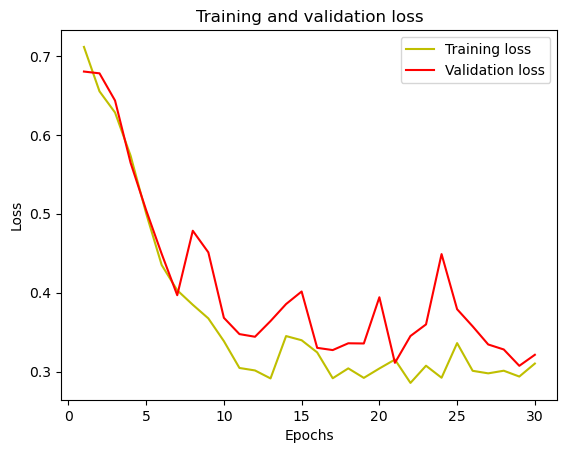

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

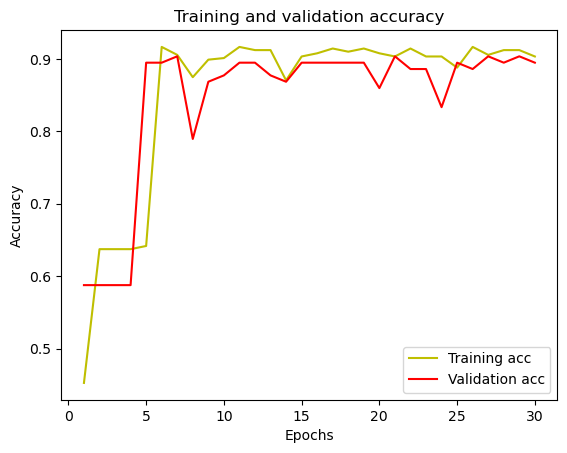

In [18]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_binary,y_pred_class))
print(confusion_matrix(y_test_binary,y_pred_class))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        47
           1       0.89      0.94      0.91        67

    accuracy                           0.89       114
   macro avg       0.90      0.89      0.89       114
weighted avg       0.90      0.89      0.89       114

[[39  8]
 [ 4 63]]
